In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('games_data.csv')
cols = ['url','end_time', 'uuid', 'time_class',
       'rules', 'white.result', 'white.@id', 'white.username',
       'white.uuid', 'black.result',
       'black.username', 'black.uuid', 'start_time', 'accuracies.white',
       'accuracies.black']
dif = np.absolute(df['white.rating'] - df['black.rating'])
df = df[cols]
raw = pd.read_csv('raw_stat.csv')
raw['Rating_dif'] = dif
raw = raw.loc[:,['Date', 'White', 'Black', 'Rating_dif', 'Opening','winner', 'url']].set_index("Opening")
raw 

,Date,White,Black,Rating_dif,winner,url
Opening,,,,,,
A00,2018.05.21,jtucker109,Lancelot601,230,Lancelot601,https://www.chess.com/game/live/2824429098
A00,2018.05.21,AASHW1N,jtucker109,115,AASHW1N,https://www.chess.com/game/live/2824447023
A00,2018.05.23,jtucker109,fac2496,158,fac2496,https://www.chess.com/game/live/2828832941
A00,2018.05.23,jtucker109,thekennis,62,jtucker109,https://www.chess.com/game/live/2830048038
B21,2018.05.23,123damian1,jtucker109,69,jtucker109,https://www.chess.com/game/live/2830237134
...,...,...,...,...,...,...
D30,2021.12.11,lewisndreams,el-bantu,47,el-bantu,https://www.chess.com/game/live/32920754241
B07,2021.12.11,josema111222,el-bantu,24,josema111222,https://www.chess.com/game/live/32921342437
A05,2021.12.11,el-bantu,Moshai,26,Moshai,https://www.chess.com/game/live/32921374019


/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/356273191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jtuck.winner[jtuck['winner'] != 'jtucker109'] = 0
/Users/jasontucker/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/356273191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

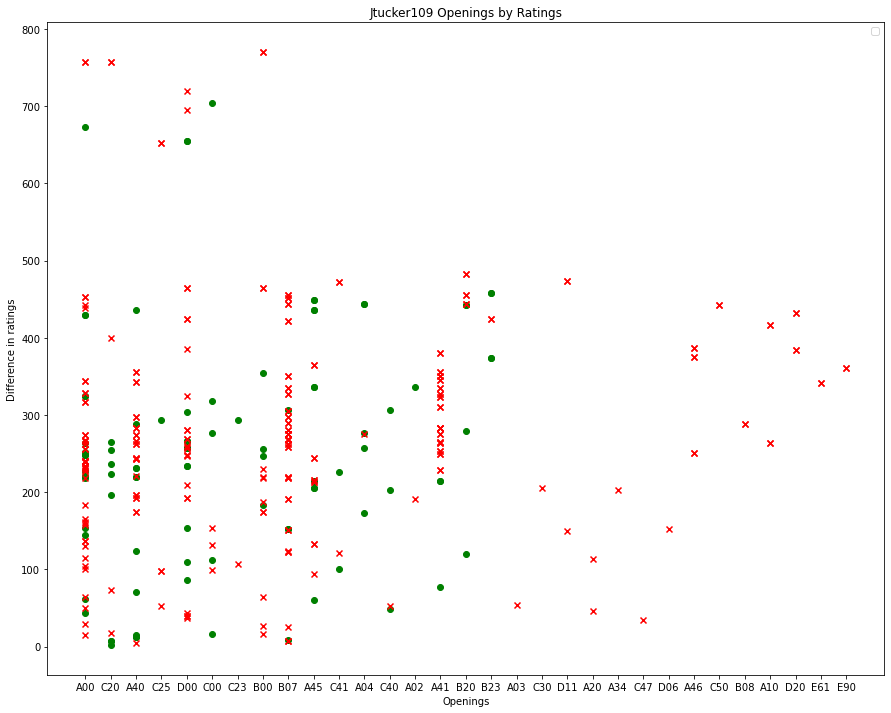

In [43]:
jtuck = raw.loc[(raw['White'].str.contains('jtucker109') | raw['Black'].str.contains('jtucker109'))]
# jtuck_opn = jtuck.index.value_counts()
jtuck.winner[jtuck['winner'] != 'jtucker109'] = 0
jtuck.winner[jtuck['winner'] == 'jtucker109'] = 1
jdata = jtuck.loc[['A00', 'C20', 'A40', 'A03', 'C25', 'C30', 'D00', 'C00', 'C23',
       'B00', 'D11', 'B07', 'A45', 'C41', 'A20', 'A04', 'A34', 'C40',
       'A02', 'C47', 'D06', 'A46', 'A41', 'C50', 'B20', 'B08', 'A10',
       'D20', 'E61', 'E90', 'B23'],['Rating_dif', 'winner']]
j_win = jdata.loc[jdata.winner == 1, 'Rating_dif'] 
j_loss = jdata.loc[jdata.winner == 0, 'Rating_dif'] 
plt.figure(figsize=(15,12))
plt.scatter(j_win.index,j_win, marker='o', color='green')
plt.scatter(j_loss.index,j_loss, marker='x', color='red')
plt.xlabel('Openings')
plt.ylabel('Difference in ratings')
plt.legend(loc='upper right')
plt.title('Jtucker109 Openings by Ratings')
plt.show()

/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/1427535811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tino.winner[tino['winner'] != 'SoLiD187'] = 0
/Users/jasontucker/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/1427535811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

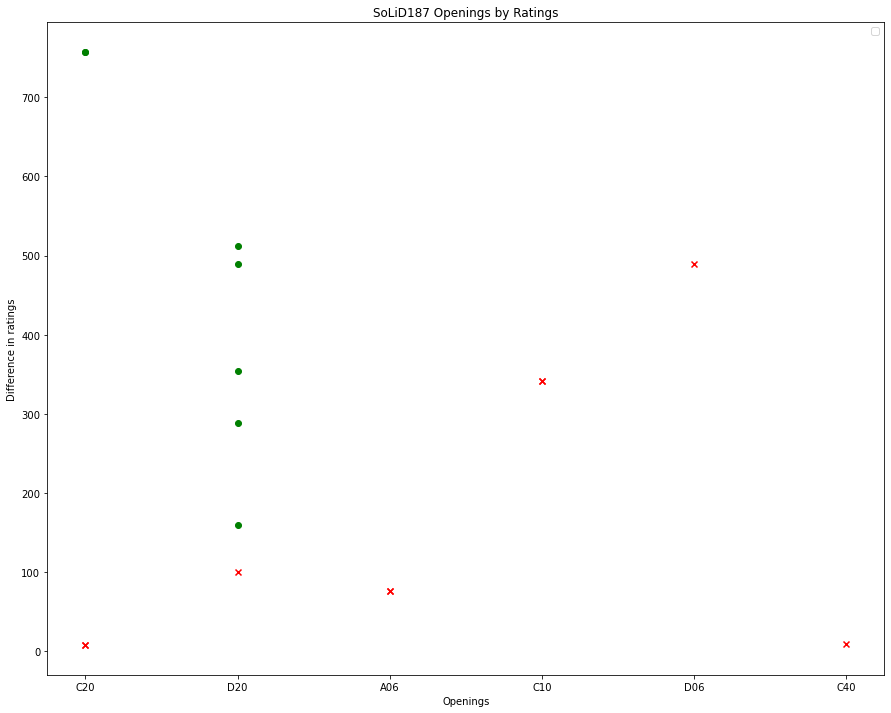

In [44]:
tino = raw.loc[(raw['White'].str.contains('SoLiD187') | raw['Black'].str.contains('SoLiD187'))]
tino.winner[tino['winner'] != 'SoLiD187'] = 0
tino.winner[tino['winner'] == 'SoLiD187'] = 1
tdata = tino.loc[['C20', 'A06', 'C10', 'D06', 'D20', 'C40'],['Rating_dif', 'winner']]
t_win = tdata.loc[tdata.winner == 1, 'Rating_dif']
t_loss = tdata.loc[tdata.winner == 0, 'Rating_dif']
plt.figure(figsize=(15,12))
plt.scatter(t_win.index,t_win, marker='o', color='green')
plt.scatter(t_loss.index,t_loss, marker='x', color='red')
plt.xlabel('Openings')
plt.ylabel('Difference in ratings')
plt.legend(loc='upper right')
plt.title('SoLiD187 Openings by Ratings')
plt.show()

/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/1569512440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lulu.winner[lulu['winner'] != 'lulu_belge'] = 0
/Users/jasontucker/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/1569512440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

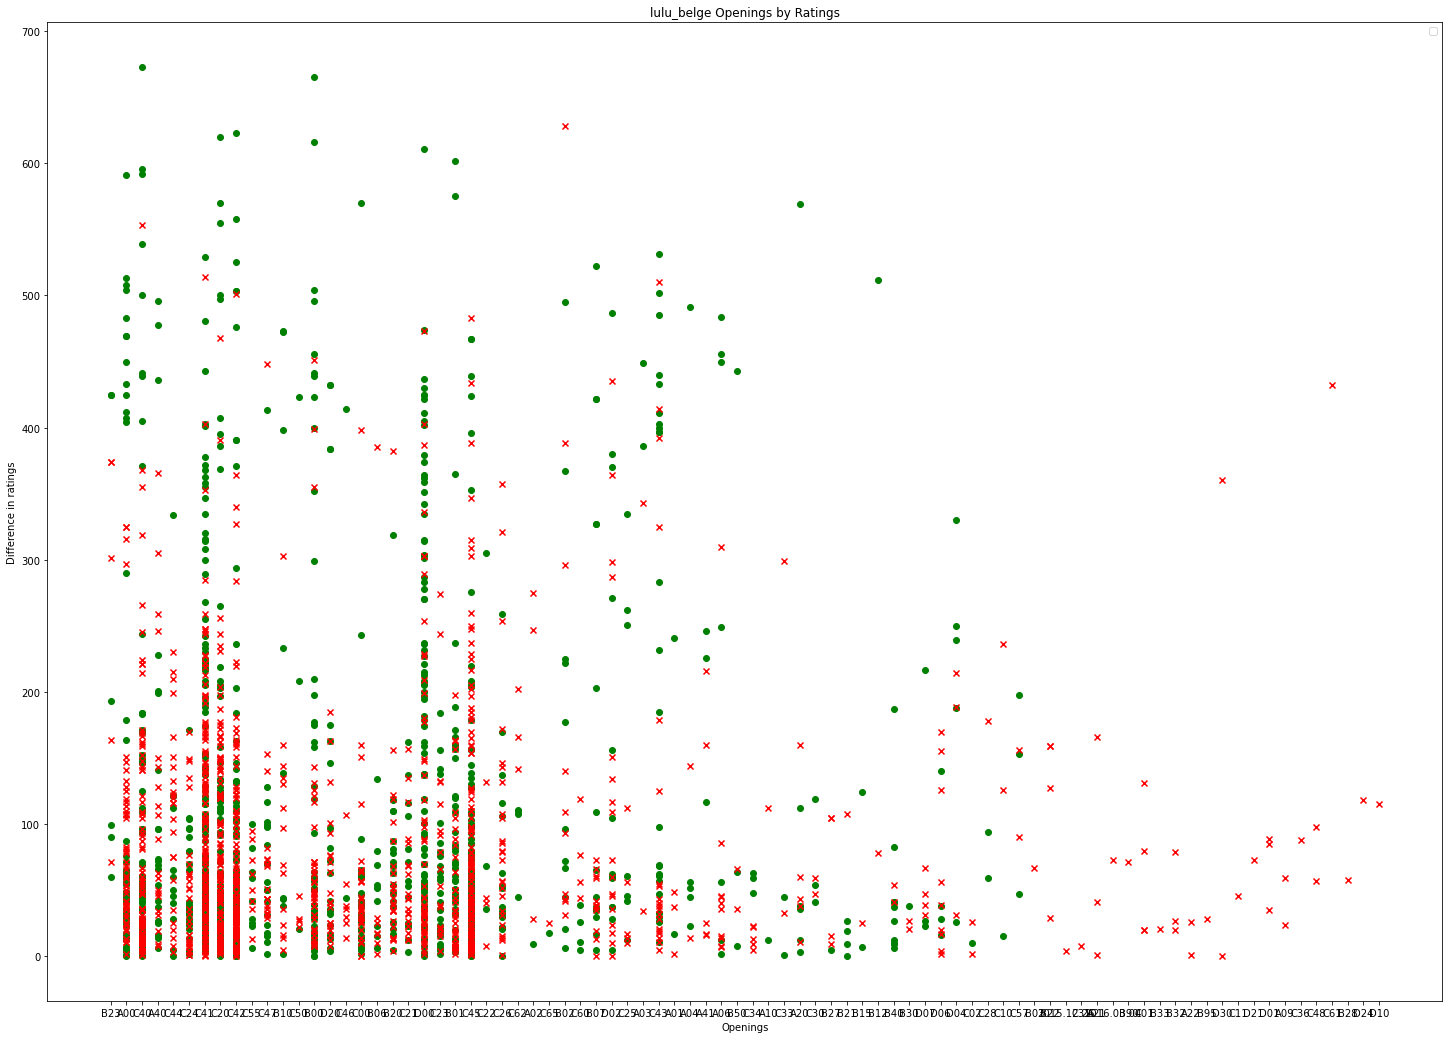

In [45]:
lulu = raw.loc[(raw['White'].str.contains('lulu_belge') | raw['Black'].str.contains('lulu_belge'))]
lulu.winner[lulu['winner'] != 'lulu_belge'] = 0
lulu.winner[lulu['winner'] == 'lulu_belge'] = 1
ldata = lulu.loc[['B23', 'A00', 'C40', 'A40', 'C44', 'C24', 'C41', 'C20', 'C42', 'C55',
       'C47', 'B10', 'C50', 'B00', 'D20', 'B03', 'B22', 'C46', 'C00',
       '2015.12.26', 'B06', 'B20', 'C21', 'D00', 'C23', 'B01', 'C45', 'C22',
       'C26', 'C62', 'A02', 'C65', 'B02', 'C31', 'C60', 'B07', 'A21', 'D02',
       'C25', 'A03', '2016.03.04', 'C43', 'A01', 'A04', 'B90', 'A41', 'A06',
       'B50', 'C34', 'A10', 'C33', 'A20', 'C30', 'C01', 'B27', 'B21', 'B33',
       'B32', 'B15', 'A22', 'B12', 'B40', 'B30', 'B95', 'D30', 'D07', 'C11',
       'D21', 'D06', 'D04', 'D01', 'C02', 'A09', 'C36', 'C48', 'C61', 'B28',
       'C28', 'C10', 'D24', 'D10','C57']]
l_win = ldata.loc[ldata.winner == 1, 'Rating_dif']
l_loss = ldata.loc[ldata.winner == 0, 'Rating_dif']
plt.figure(figsize=(25,18))
plt.scatter(l_win.index,l_win, marker='o', color='green')
plt.scatter(l_loss.index,l_loss, marker='x', color='red')
plt.xlabel('Openings')
plt.ylabel('Difference in ratings')
plt.legend(loc='upper right')
plt.title('lulu_belge Openings by Ratings')
plt.show()

/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/1194341988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gedi.winner[gedi['winner'] != 'el-bantu'] = 0
/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/1194341988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gedi.winner[gedi['winner'] == 'el-bantu'] = 1
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


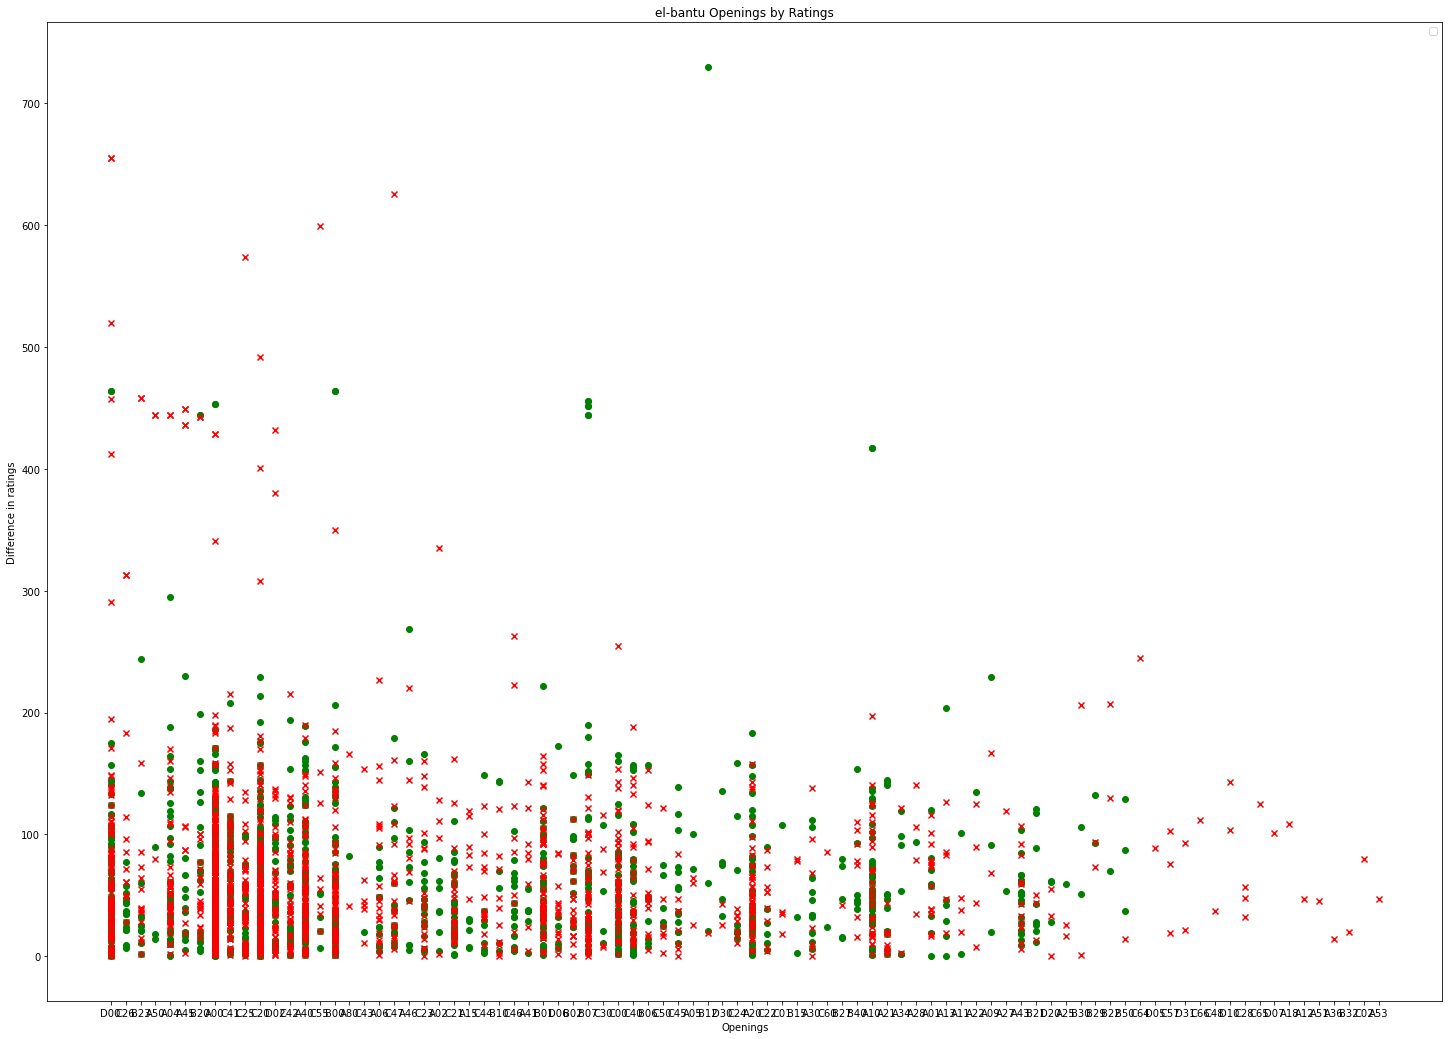

In [46]:
gedi = raw.loc[(raw['White'].str.contains('el-bantu') | raw['Black'].str.contains('el-bantu'))].copy()
gedi.winner[gedi['winner'] != 'el-bantu'] = 0
gedi.winner[gedi['winner'] == 'el-bantu'] = 1
gdata = gedi.loc[['D00', 'C26', 'B23', 'A50', 'A04', 'A45', 'B20', 'A00', 'C41', 'C25',
       'C20', 'D02', 'C42', 'A40', 'C55', 'B00', 'A80', 'C43', 'A06', 'C47',
       'A46', 'C23', 'C64', 'A02', 'C21', 'A15', 'C44', 'B10', 'C46', 'A41',
       'B01', 'D05', 'D06', 'B02', 'B07', 'C57', 'D31', 'C30', 'C66', 'C00',
       'C40', 'B06', 'C48', 'C50', 'D10', 'C28', 'C65', 'C45', 'A05', 'B12',
       'D30', 'C24', 'A20', 'C22', 'C01', 'B15', 'A30', 'C60', 'B27', 'B40',
       'A10', 'A21', 'A34','A28', 'A01', 'A13','A11', 'A22', 'A09', 'A27',
       'A43', 'D07', 'B21', 'A18', 'D20', 'A12','A51', 'A36', 'A25', 'B30',
       'B29', 'B22', 'B32', 'C02', 'A53', 'B50']]
g_win = gdata.loc[gdata.winner == 1, 'Rating_dif']
g_loss = gdata.loc[gdata.winner == 0, 'Rating_dif']
plt.figure(figsize=(25,18))
plt.scatter(g_win.index,g_win, marker='o', color='green')
plt.scatter(g_loss.index,g_loss, marker='x', color='red')
plt.xlabel('Openings')
plt.ylabel('Difference in ratings')
plt.legend(loc='upper right')
plt.title('el-bantu Openings by Ratings')
plt.show()

/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/1148939359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phil.winner[phil['winner'] != 'pgarcia05'] = 0
/Users/jasontucker/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/93/f5q64fzs6zx14kph57c1wgh00000gn/T/ipykernel_47264/1148939359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

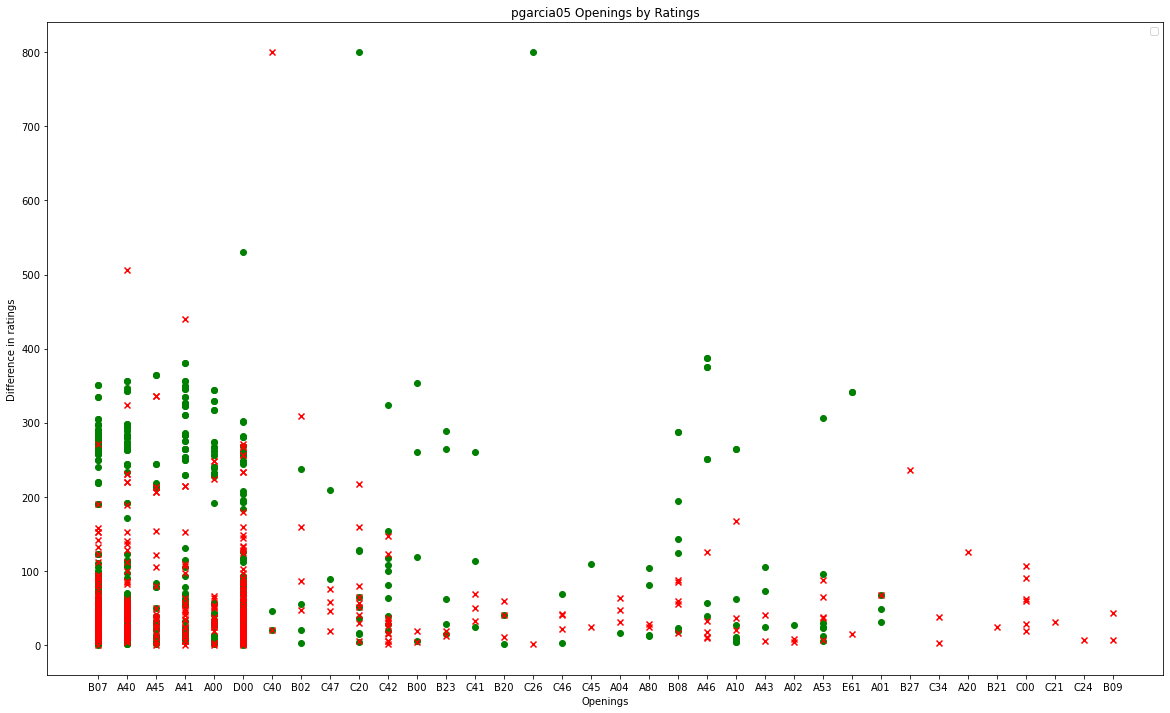

In [47]:
phil = raw.loc[(raw['White'].str.contains('pgarcia05') | raw['Black'].str.contains('pgarcia05'))]
phil.winner[phil['winner'] != 'pgarcia05'] = 0
phil.winner[phil['winner'] == 'pgarcia05'] = 1
pdata = phil.loc[['B07', 'A40', 'A45', 'A41', 'A00', 'D00', 'C40', 'B27', 'B02', 'C34',
       'C47', 'C20', 'A20', 'C42', 'B00', 'B23', 'C41', 'B21', 'B20', 'C26',
       'C46', 'C00', 'C21', 'C45', 'A04', 'A80', 'B08', 'A46', 'A10', 'A43',
       'A02', 'A53', 'C24', 'E61', 'A01', 'B09']]
p_win = pdata.loc[pdata.winner == 1, 'Rating_dif']
p_loss = pdata.loc[pdata.winner == 0, 'Rating_dif']
plt.figure(figsize=(20,12))
plt.scatter(p_win.index,p_win, marker='o', color='green')
plt.scatter(p_loss.index,p_loss, marker='x', color='red')
plt.xlabel('Openings')
plt.ylabel('Difference in ratings')
plt.legend(loc='upper right')
plt.title('pgarcia05 Openings by Ratings')
plt.show()